In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.

In [2]:
from sklearn.datasets import make_classification
data, target = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    class_sep=0.8,
    random_state=42,
)

feature_names = [f'feature_{i}' for i in range(data.shape[1])]
target_names = ['class_0', 'class_1']

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

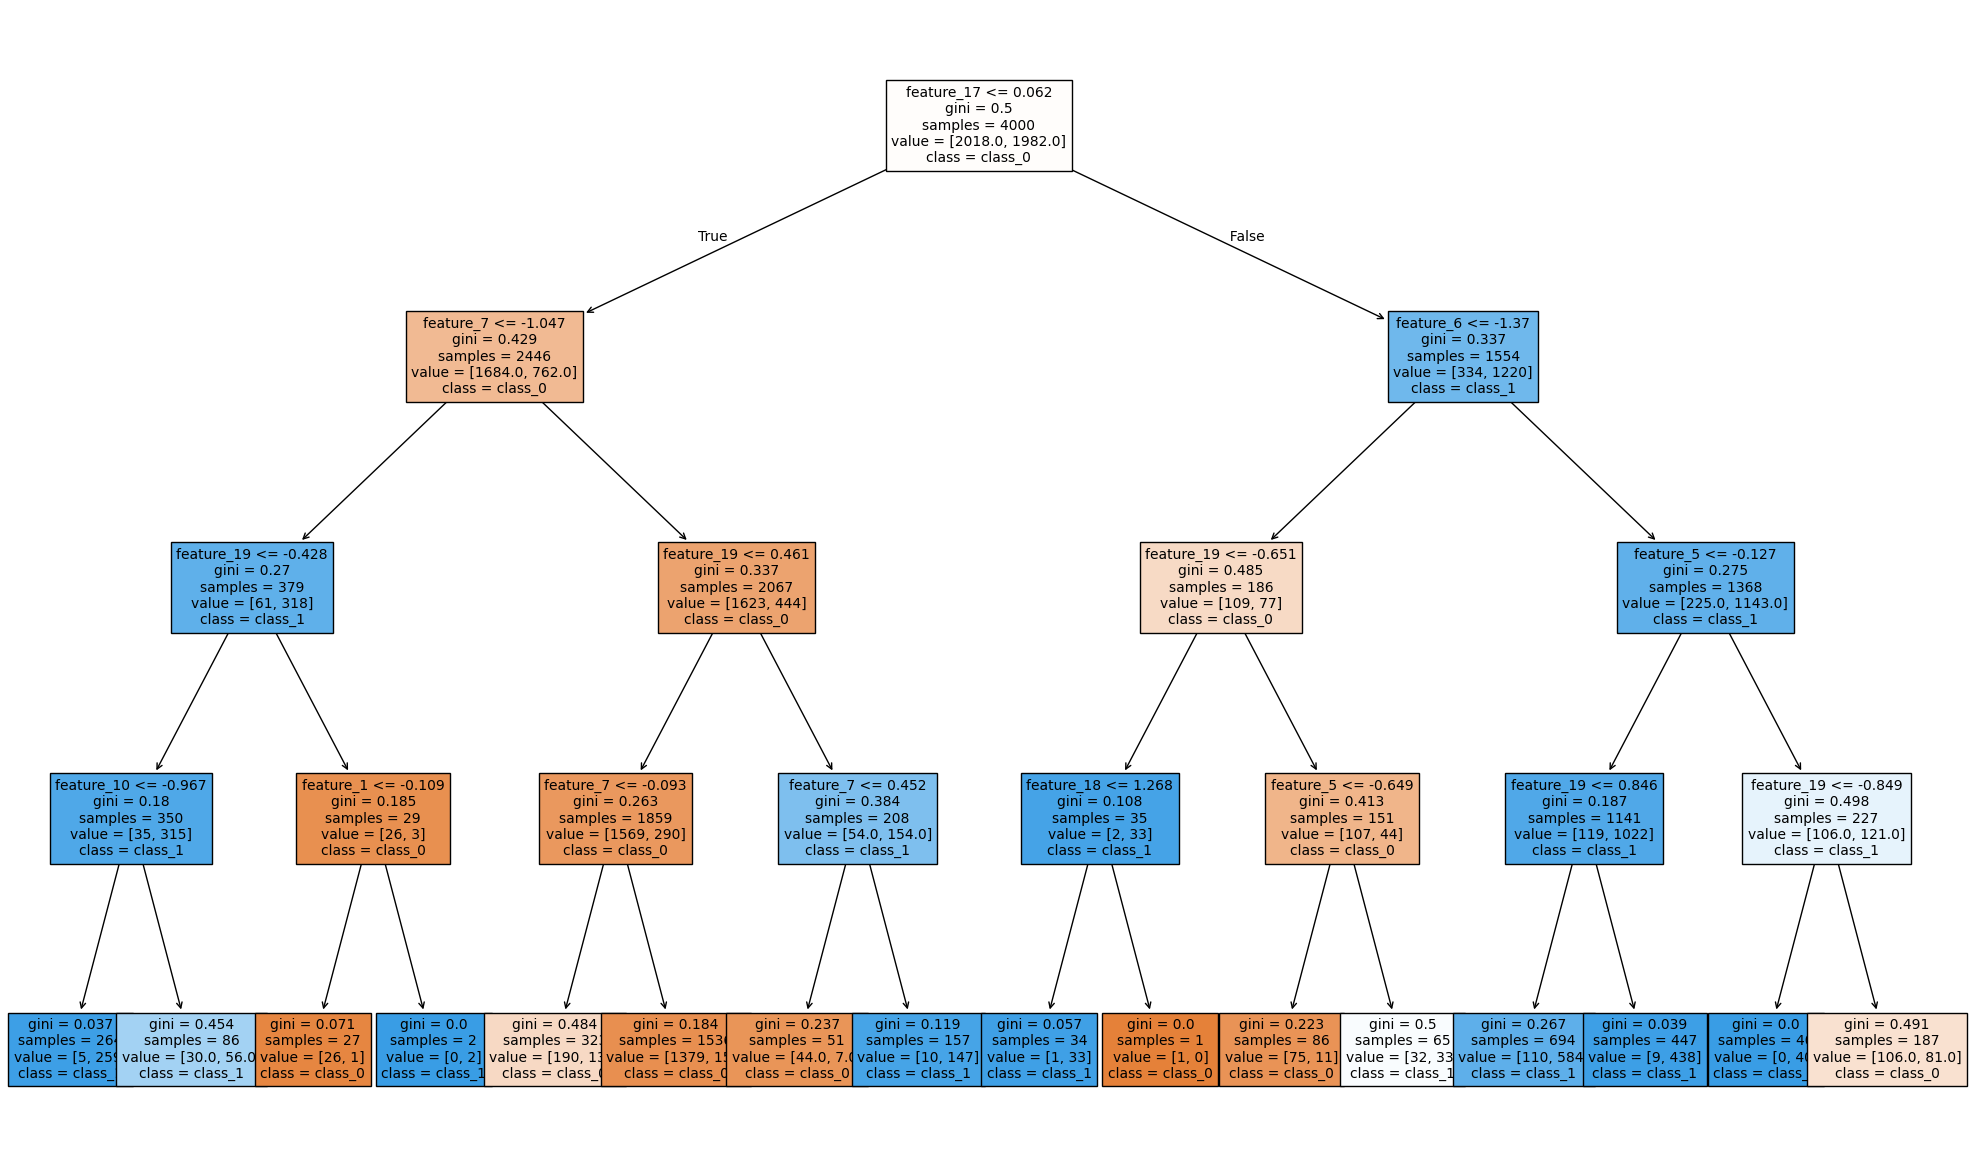

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(train_data, train_target)

plt.figure(figsize=(25, 15))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    fontsize=10
)
plt.show()

2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

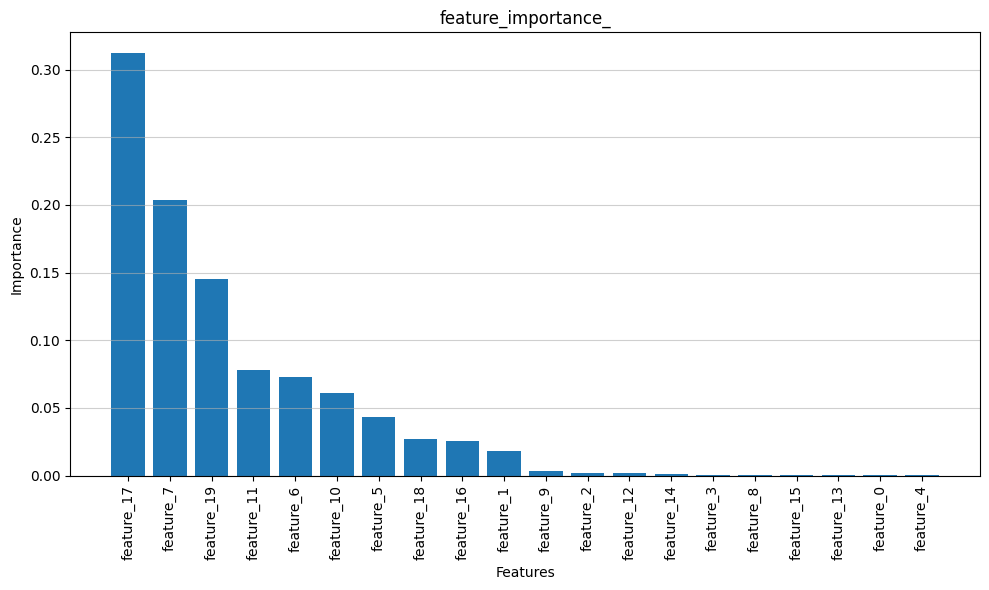

[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2C0D9462B40)]
 [DecisionTreeRegres

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(train_data, train_target)

importances = model.feature_importances_
feature_names = [f'feature_{i}' for i in range(train_data.shape[1])]

indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("feature_importance_")
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()

print(model.estimators_)

3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.


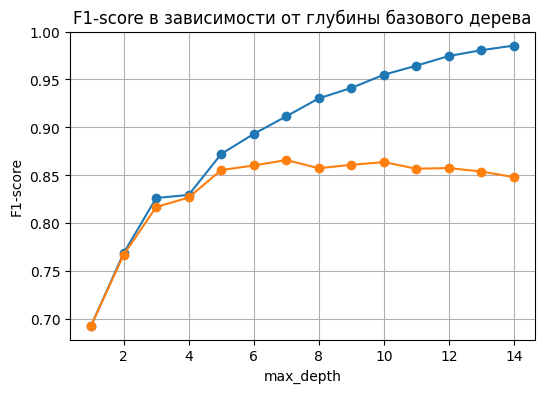

In [6]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = make_scorer(f1_score)


depths = [i for i in range(1, 15)]
train_scores = []
kfold_scores = []
for i in depths:
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(data, target)
    preds = model.predict(data)

    train_score = f1_score(target, preds)
    train_scores.append(train_score)

    kfold_score = cross_val_score(model, data, target, cv=kf, scoring=scoring).mean()
    kfold_scores.append(kfold_score)



plt.figure(figsize=(6, 4))
plt.plot(depths, train_scores, marker='o')
plt.plot(depths, kfold_scores, marker='o')
plt.title('F1-score в зависимости от глубины базового дерева')
plt.xlabel('max_depth')
plt.ylabel('F1-score')
plt.grid(True)
plt.show()

In [7]:
test_data.shape, train_data.shape

((1000, 20), (4000, 20))

4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.
Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.

Finished model with n_estimators=600 and max_depth=5
Finished model with n_estimators=500 and max_depth=5
Finished model with n_estimators=400 and max_depth=5
Finished model with n_estimators=350 and max_depth=5
Finished model with n_estimators=300 and max_depth=5
Finished model with n_estimators=250 and max_depth=5
Finished model with n_estimators=200 and max_depth=5
Finished model with n_estimators=150 and max_depth=5
Finished model with n_estimators=100 and max_depth=5
Finished model with n_estimators=50 and max_depth=5
Finished model with n_estimators=30 and max_depth=5
Finished model with n_estimators=20 and max_depth=5
Finished model with n_estimators=600 and max_depth=6
Finished model with n_estimators=500 and max_depth=6
Finished model with n_estimators=400 and max_depth=6
Finished model with n_estimators=350 and max_depth=6
Finished model with n_estimators=300 and max_depth=6
Finished model with n_estimators=250 and max_depth=6
Finished model with n_estimators=200 and max_dept

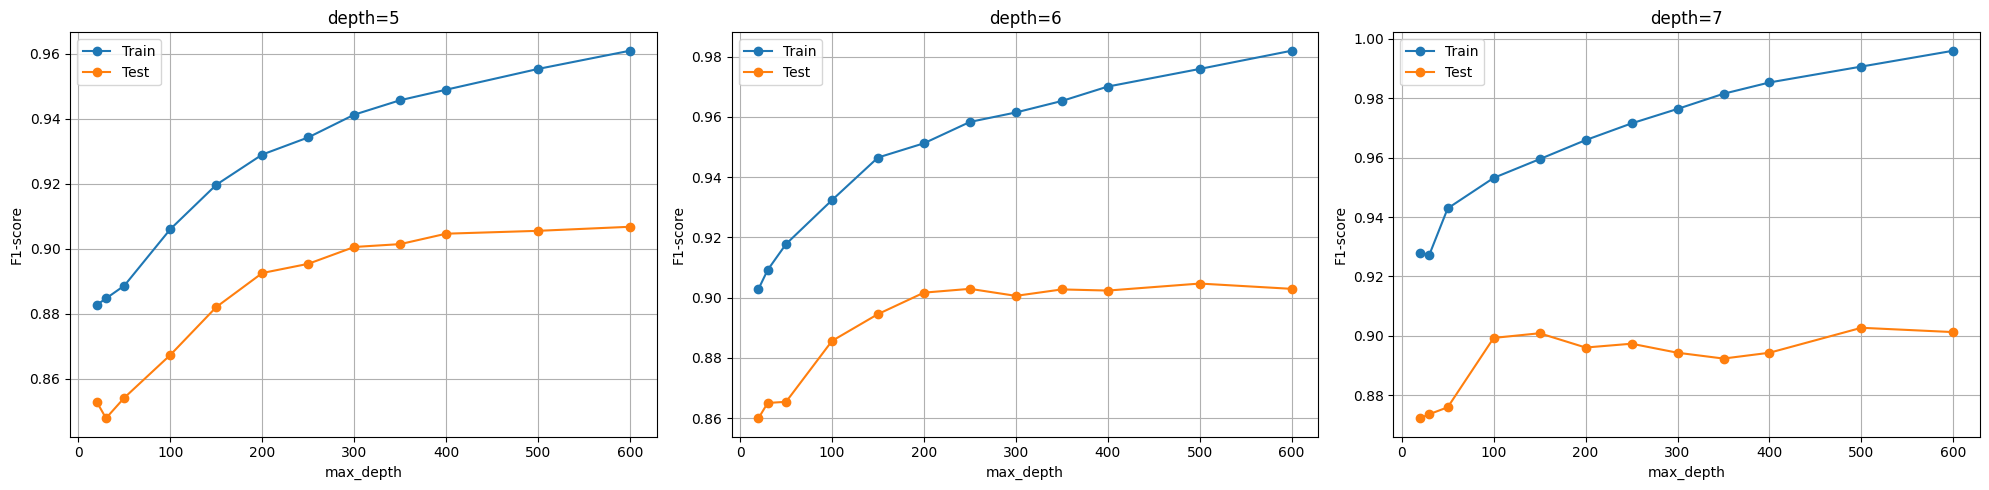

In [10]:
n_estimators_list = [20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 500, 600]
depths = [5, 6, 7]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes.flatten()

for depth, i in zip(depths, range(len(depths))):
    train_scores = []
    test_scores = []

    model = GradientBoostingClassifier(n_estimators=max(n_estimators_list), max_depth=depth, random_state=42, learning_rate=0.01)
    model.fit(train_data, train_target)

    for n_estimators in reversed(n_estimators_list):
        model.estimators_ = model.estimators_[:n_estimators]
        model.n_estimators_ = n_estimators

        train_score = f1_score(train_target, model.predict(train_data))
        train_scores.append(train_score)
        test_score = f1_score(test_target, model.predict(test_data))
        test_scores.append(test_score)

        print(f"Finished model with n_estimators={n_estimators} and max_depth={depth}")

    train_scores.reverse()
    test_scores.reverse()

    axes[i].plot(n_estimators_list, train_scores, marker='o', label='Train')
    axes[i].plot(n_estimators_list, test_scores, marker='o', label='Test')
    axes[i].set_title(f'depth={depth}')
    axes[i].set_xlabel('max_depth')
    axes[i].set_ylabel('F1-score')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()
    

показать данные 


5. Выполнить предыдущий пункт для случайного леса. Сравнить оценку out-of-bag с оценкой по кроссвалидации.

Finished model with n_estimators=30, max_depth=9
Finished model with n_estimators=30, max_depth=12
Finished model with n_estimators=30, max_depth=15
Finished model with n_estimators=30, max_depth=18
Finished model with n_estimators=30, max_depth=21
Finished model with n_estimators=30, max_depth=24
Finished model with n_estimators=30, max_depth=27
Finished model with n_estimators=30, max_depth=30
Finished model with n_estimators=30, max_depth=33
Finished model with n_estimators=30, max_depth=36
Finished model with n_estimators=30, max_depth=39
Finished model with n_estimators=100, max_depth=9
Finished model with n_estimators=100, max_depth=12
Finished model with n_estimators=100, max_depth=15
Finished model with n_estimators=100, max_depth=18
Finished model with n_estimators=100, max_depth=21
Finished model with n_estimators=100, max_depth=24
Finished model with n_estimators=100, max_depth=27
Finished model with n_estimators=100, max_depth=30
Finished model with n_estimators=100, max_de

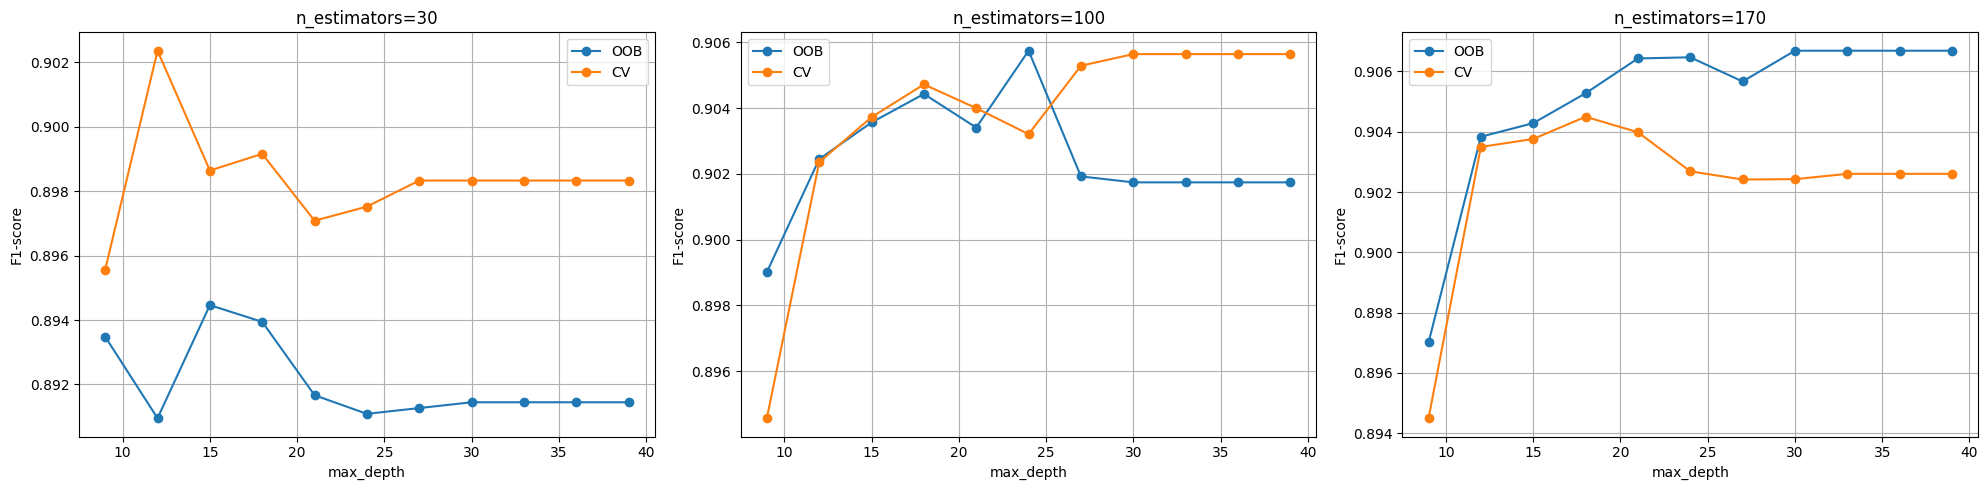

In [9]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [30 + 70 * i for i in range(3)]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()


for n_estimators, ax in zip(n_estimators_list, axes):
    depths = [i for i in range(9, 40, 3)]
    oob_scores = []
    kfold_scores = []

    for depth in depths:
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=depth,
            random_state=42,
            oob_score=True,
            n_jobs=-1
        )
        model.fit(data, target)

        oob_preds = np.argmax(model.oob_decision_function_, axis=1)
        oob_score = f1_score(target, oob_preds)
        oob_scores.append(oob_score)

        kfold_score = cross_val_score(model, data, target, cv=kf, scoring='f1', n_jobs=-1).mean()
        kfold_scores.append(kfold_score)

        print(f"Finished model with n_estimators={n_estimators}, max_depth={depth}")

    ax.plot(depths, oob_scores, marker='o', label='OOB')
    ax.plot(depths, kfold_scores, marker='o', label='CV')
    ax.set_title(f'n_estimators={n_estimators}')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('F1-score')
    ax.grid(True)
    ax.legend()


plt.tight_layout()
plt.show()
    